# Stroke Prediction 

Stroke prediction involves using various data sources and predictive models to identify individuals who are at risk of having a stroke. Some common approaches to stroke prediction include analyzing medical history, assessing risk factors such as high blood pressure and cholesterol levels, and monitoring changes in vital signs over time. Machine learning algorithms can be trained on large datasets to identify patterns and risk factors that may be missed by traditional diagnostic methods. By identifying individuals who are at high risk of having a stroke, healthcare providers can intervene early with preventative measures such as medication, lifestyle changes, and medical procedures to reduce the risk of stroke and improve patient outcomes.





# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5012,14688,Female,44.0,0,0,Yes,Private,Urban,73.87,28.8,smokes,0
3642,28091,Female,43.0,0,0,Yes,Govt_job,Urban,85.03,23.9,formerly smoked,0
2064,30692,Male,73.0,0,0,Yes,Private,Rural,82.13,28.5,never smoked,0
5076,39935,Female,34.0,0,0,Yes,Private,Rural,174.37,23.0,never smoked,0
991,66494,Male,48.0,0,0,Yes,Private,Urban,91.96,24.9,Unknown,0
2987,20006,Female,15.0,0,0,No,Private,Urban,76.77,21.7,Unknown,0
4016,58508,Female,18.0,0,0,No,Govt_job,Rural,112.33,23.2,formerly smoked,0
4780,33370,Female,48.0,0,0,Yes,Private,Rural,114.92,29.2,Unknown,0
4735,35660,Male,18.0,0,0,No,Private,Rural,115.46,27.6,Unknown,0
152,32503,Female,80.0,0,0,Yes,Self-employed,Urban,76.57,34.1,never smoked,1


In [4]:
print(f'Features : {df.shape[1]} \nEntries : {df.shape[0]}')

Features : 12 
Entries : 5110


# Data Preprocessing

### Handling Missing Values

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

3.93% data are missing in bmi feature. Since, the ratio of missing values are less, we can fill it with mean of bmi.

<Figure size 720x720 with 0 Axes>

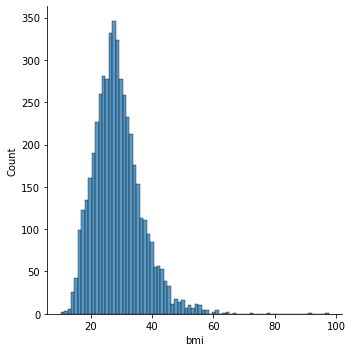

In [7]:
plt.figure(figsize=(10,10))
sns.displot(df['bmi'])
plt.show()


In [8]:
df['bmi'].median()

28.1

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [10]:
print(f' No. of duplicate records : {df.duplicated().sum()}')

 No. of duplicate records : 0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [12]:
df['age'] = df['age'].astype('int64')

### Feature Selection

In our dataset, we dont need id column since it is unique to every entry and we dont have to rely on id field. So, we can drop the id column. Also the datatype of age feature is in float, we can convert it into integer to save memory.

In [13]:
df.drop('id', axis=1, inplace=True)

# EDA - Exploratory Data Analysis

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

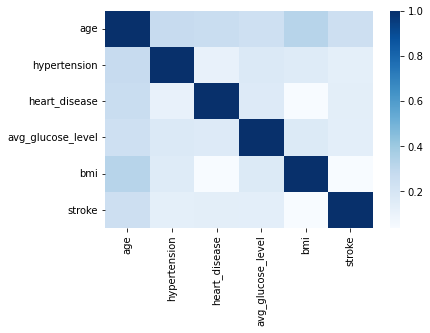

In [15]:
sns.heatmap(df.corr(), cmap='Blues')

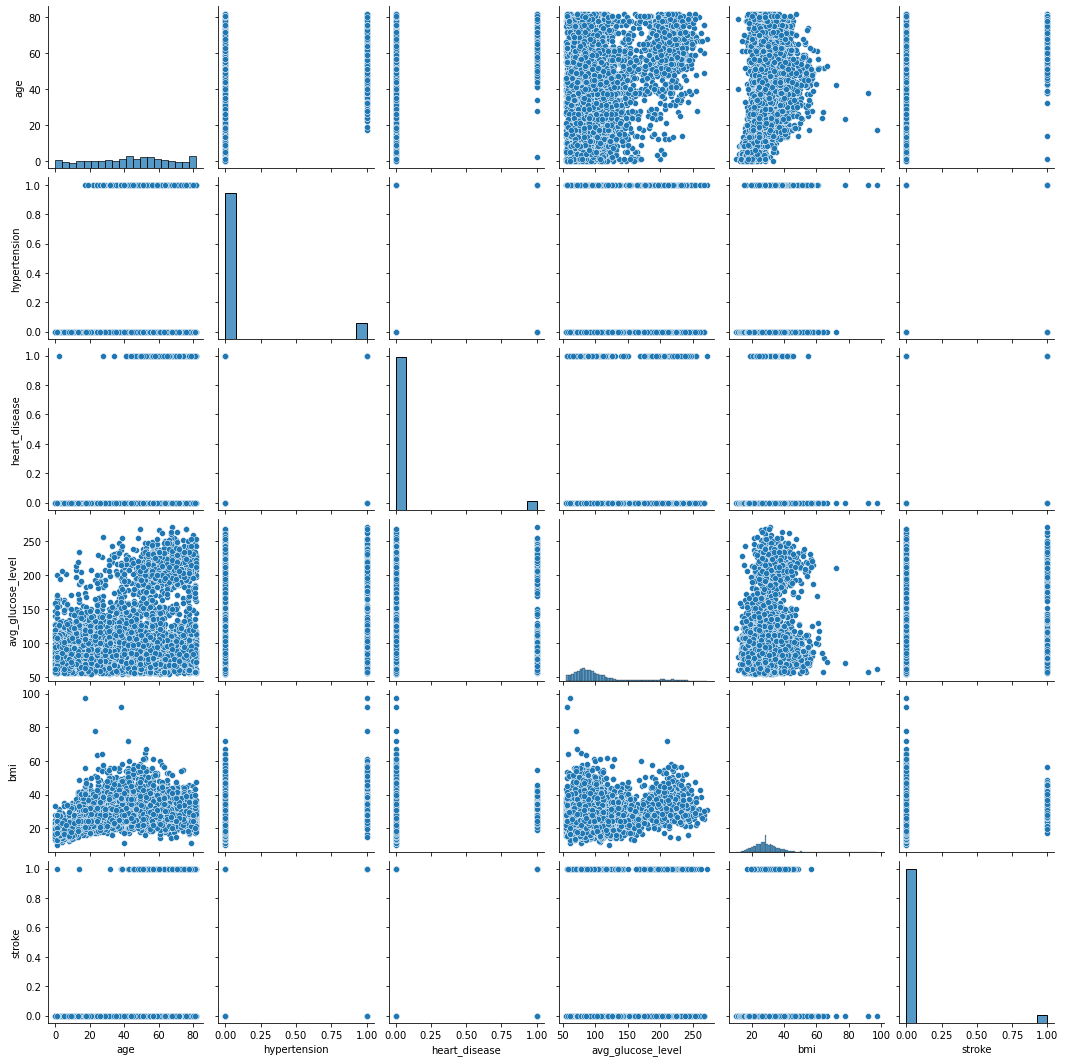

In [16]:
sns.pairplot(df)
plt.show()

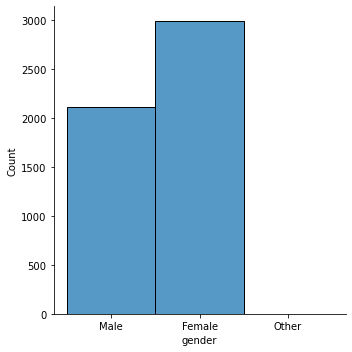

In [17]:
sns.displot(data=df, x='gender')

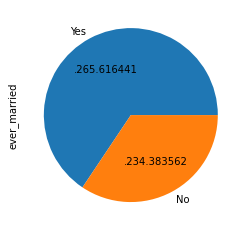

In [18]:
df['ever_married'].value_counts().plot(kind='pie', autopct='.2%f')

#plt.legend(labels=['Yes','No'])
plt.show()

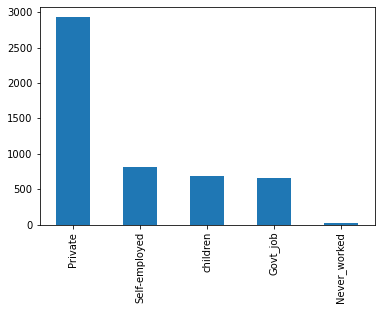

In [19]:
df['work_type'].value_counts().plot(kind='bar')
#plt.legend(labels = ['Private','Self Employed','Children','Government Job','Never Worked'])
plt.show()

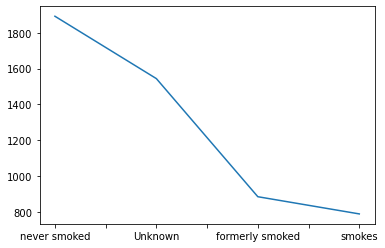

In [20]:
df['smoking_status'].value_counts().plot(kind='line')
#plt.legend(labels=['Never Smoked','Unknown','Formerly Smoked','Smoker'])
plt.show()

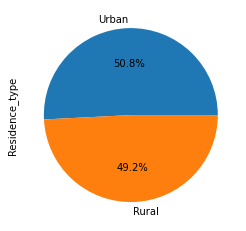

In [21]:
df['Residence_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

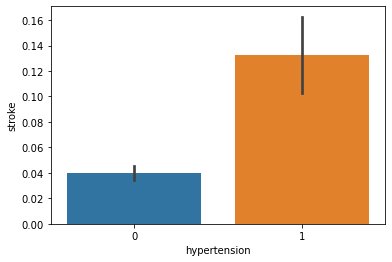

In [22]:
sns.barplot(x=df['hypertension'],y=df['stroke'])
plt.show()

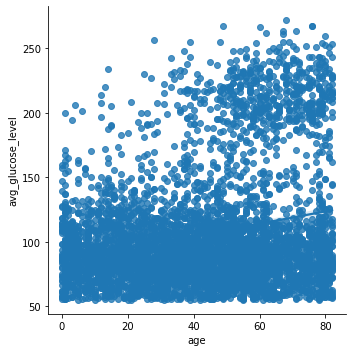

In [23]:
sns.lmplot(data=df, x = 'age', y='avg_glucose_level')
plt.show()

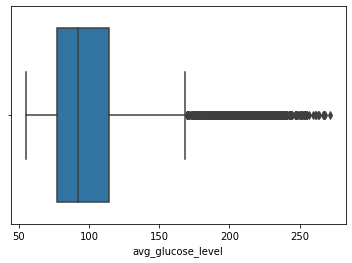

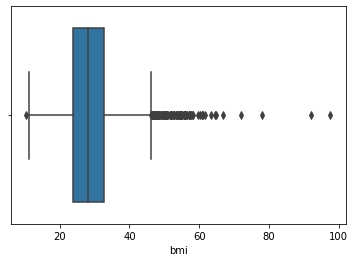

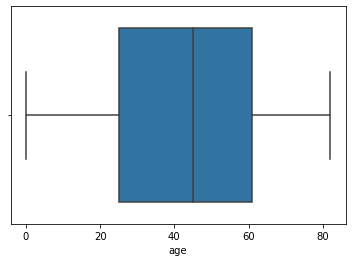

In [24]:
cols = df[['avg_glucose_level', 'bmi', 'age']]

for col in cols:
    sns.boxplot(x = df[col])
    plt.show()

<AxesSubplot:>

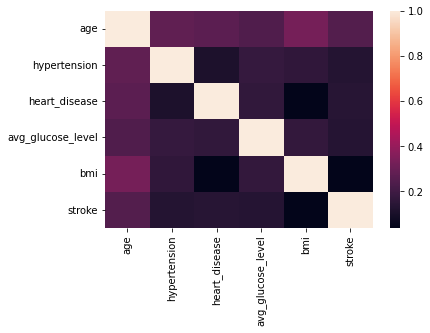

In [25]:
# Heatmap Cat-Cat

sns.heatmap(df.corr())

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

In [27]:
gender = lenc.fit_transform(df['gender'])
ever_married = lenc.fit_transform(df['ever_married'])
work_type = lenc.fit_transform(df['work_type'])
Residence_type = lenc.fit_transform(df['Residence_type'])
smoking_status = lenc.fit_transform(df['smoking_status'])

In [28]:
df['gender'] = gender
df['ever_married'] = ever_married
df['work_type'] = work_type
df['Residence_type'] = Residence_type
df['smoking_status'] = smoking_status

# Partioning of Data

splitting the data in order to train the model. Since our output is stroke, we store it in y and everything else in x.

In [29]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [30]:
unique, count = np.unique(y, return_counts=True)
Y_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_dict_value_count

{0: 4861, 1: 249}

There is imbalance in our Stroke field. The number of people having stroke is way lesser than people not having stroke.

# SMOTE (Synthetic Minority Oversampling Technique)

Using SMOTE to oversample the data

In [31]:
# As we can See our data is imbalanced we will apply smote 

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=20)
X_res, y_res = sm.fit_resample(x, y)

In [33]:
unique, count = np.unique(y_res, return_counts=True)
Y_dict_value_count = {k:v for (k,v) in zip(unique, count)}
Y_dict_value_count

{0: 4861, 1: 4861}

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=20)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7291, 10)
(7291,)
(2431, 10)
(2431,)


# Training on Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred_dt = dt.predict(X_test)

In [39]:
acc_dt = accuracy_score(y_test, y_pred_dt)

In [40]:
acc_dt

0.9020979020979021

In [41]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.93      0.87      0.90      1210\n           1       0.88      0.93      0.91      1221\n\n    accuracy                           0.90      2431\n   macro avg       0.90      0.90      0.90      2431\nweighted avg       0.90      0.90      0.90      2431\n'

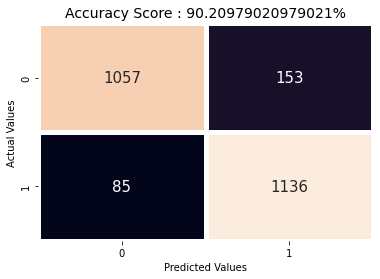

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, annot_kws ={'fontsize':15} , fmt="d", linewidths=5, cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Accuracy Score : { (acc_dt * 100) }%', size=14)
plt.show()

The Decision Tree model gave an accuracy of 90%. Let us try to build the model using Random Forest

# Training with Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)

In [44]:
acc_rf

0.9399424105306459

In [45]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94      1210\n           1       0.92      0.97      0.94      1221\n\n    accuracy                           0.94      2431\n   macro avg       0.94      0.94      0.94      2431\nweighted avg       0.94      0.94      0.94      2431\n'

In [46]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[1104,  106],
       [  40, 1181]], dtype=int64)

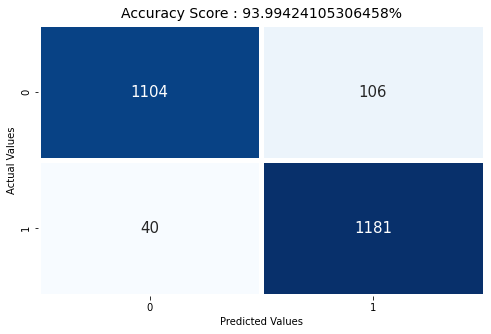

In [47]:
plt.figure(figsize = (8, 5))

sns.heatmap(cm, cmap='Blues', annot=True, annot_kws ={'fontsize':15} , fmt="d", linewidths=5, cbar = False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Accuracy Score : { (acc_rf * 100) }%', size=14)
plt.show(block=True)

Here, our type 1 error is 106 and type 2 error is 40.


In [48]:
rf.feature_importances_

array([0.02907777, 0.39154916, 0.01582794, 0.01233   , 0.02285287,
       0.07577941, 0.02778956, 0.2017064 , 0.16877625, 0.05431064])

In [49]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [50]:
feature_importances = pd.DataFrame(columns=['Features','importance'])

In [51]:
feature_importances['Features'] = X_train.columns

In [52]:
feature_importances['importance'] = rf.feature_importances_

In [53]:
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances.style.background_gradient(cmap='Blues')

,Features,importance
1,age,0.391549
7,avg_glucose_level,0.201706
8,bmi,0.168776
5,work_type,0.075779
9,smoking_status,0.054311
0,gender,0.029078
6,Residence_type,0.027790
4,ever_married,0.022853
2,hypertension,0.015828
3,heart_disease,0.012330


### Age has most impact on the stroke.

# Conclusion

In conclusion, we see that features like Older Age, improper BMI and imbalance Glucose Level plays huge importance in Stroke.